<h1 align="center"> Medical Cost Prediction</h1>
<h4 align="center"> Using Linear Regression</h4>


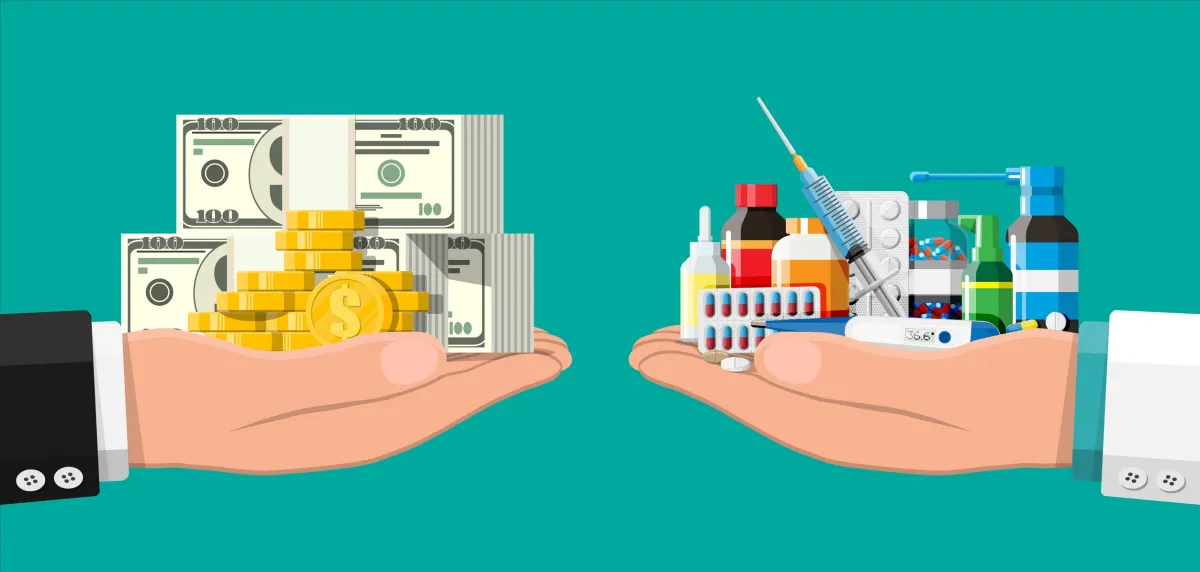

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head(100)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,3766.88380
96,54,female,30.800,3,no,southwest,12105.32000
97,55,male,38.280,0,no,southeast,10226.28420
98,56,male,19.950,0,yes,northeast,22412.64850


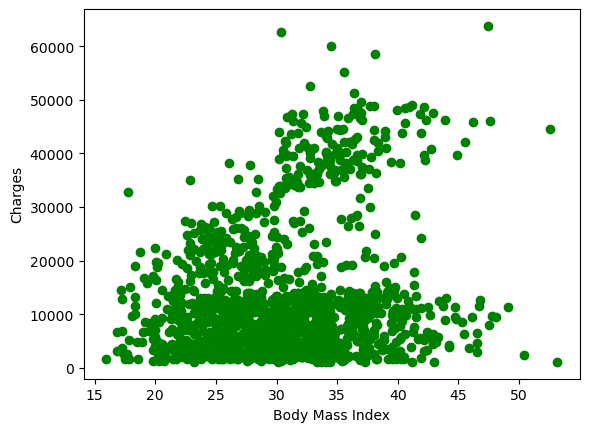

In [3]:
%matplotlib inline
plt.xlabel('Body Mass Index')
plt.ylabel('Charges')
plt.scatter(df.bmi,df.charges,color='green')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['bmi']],df['charges'])

LinearRegression()

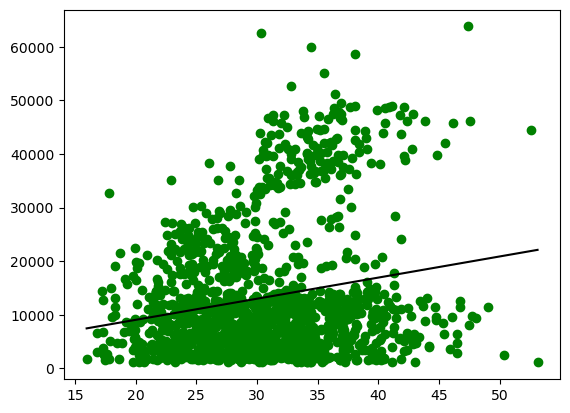

In [5]:
plt.scatter(df['bmi'], df['charges'], color='green')
x = np.linspace(df['bmi'].min(), df['bmi'].max(),100)
y = reg.predict(x.reshape(-1, 1))
plt.plot(x, y, color='black')

In [6]:
reg.predict([[75]])

array([30733.41451877])

In [7]:
#let's compare it with y = m*(bmi) + b
m = reg.coef_
m

array([393.8730308])

In [8]:
b = reg.intercept_
b

1192.9372089611497

In [9]:
y = m*75+b
y #the result is indeed the same

array([30733.41451877])

In [10]:
#read new file
my_df = pd.read_excel('/kaggle/input/medical-charges-prediction/medical_cost.xlsx')

In [11]:
#make predictions for the corresponding values in the file
predicted_costs = reg.predict(my_df)

In [12]:
#create new column to store the predicted values of the medical costs
my_df['cost'] = predicted_costs
my_df.head()

,bmi,cost
0,23.11,10295.342951
1,22.00,9858.143887
2,21.50,9661.207371
3,19.55,8893.154961
4,18.63,8530.791773
